### チューリングパターン

とりあえずネットに転がってた記事をコピペして作る. [Python3で反応拡散系のパターンを描画する](https://qiita.com/syuya_abe/items/e229992288092732e40d)

### Gray-Scottモデル
\begin{eqarray}
\frac{1}{3}

\end{eqarray}

ライブラリの導入

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math


パラメータの設定

In [7]:
#Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065
Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062


数値計算と描画

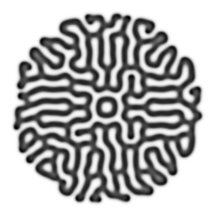

In [9]:
n  = 200
Z = np.zeros((n+2,n+2), [('U', np.double), ('V', np.double)] )
U,V = Z['U'], Z['V']
u,v = U[1:-1,1:-1], V[1:-1,1:-1]#それぞれ-1から１までを範囲とする

r = 20
u[...] = 1.0

U[n//2-r:n//2+r, n//2-r:n//2+r] = 0.50
V[n//2-r:n//2+r, n//2-r:n//2+r] = 0.25

#初期濃度はランダム関数で与える
u += 0.05*np.random.random((n,n))
v += 0.05*np.random.random((n,n))

plt.ion()

size = np.array(Z.shape)
dpi = 72.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])


for i in range(10000):#陽解法
    Lu = ( U[0:-2,1:-1] + U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] + U[2:  ,1:-1] )
    Lv = ( V[0:-2,1:-1] + V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] + V[2:  ,1:-1] )

    u += (Du*Lu - u*v*v +  F  *(1-u) )#解く式1
    v += (Dv*Lv + u*v*v - (F+k)* v   )#解く式2

im.set_data(V)#Vを出力
im.set_clim(vmin=V.min(), vmax=V.max())
plt.draw()

plt.ioff()   
plt.show()
